<h1> Part A: <h1>

In [8]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector classifier
from mlxtend.plotting import plot_decision_regions # for visualization later

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

<h1> Part B: <h1>

In [9]:
#Data Preparation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train['person_home_ownership'])
l = LabelEncoder()
l.fit(df_train['loan_intent'])
ld = LabelEncoder()
ld.fit(df_train['loan_grade'])

def prepare_data(df):
  df = df.dropna()
  y = df['loan_status']
  #df["home_ownership"] = df["person_home_ownership"]
  #df = df.drop(["loan_status"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(df_train)
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,27,98000,3.0,11750,13.47,0,0.12,6,False,False,...,False,False,False,True,False,False,False,False,False,True
2,22,36996,5.0,10000,7.51,0,0.27,4,False,False,...,False,True,False,False,False,False,False,False,True,False
3,24,26000,2.0,1325,12.87,1,0.05,4,False,False,...,False,False,False,True,False,False,False,False,True,False
4,29,53004,2.0,15000,9.63,0,0.28,10,True,False,...,False,True,False,False,False,False,False,False,True,False
6,21,21700,2.0,5500,14.91,1,0.25,2,False,False,...,False,False,False,False,True,False,False,False,True,False


In [251]:
X_train["person_age"].min()

20

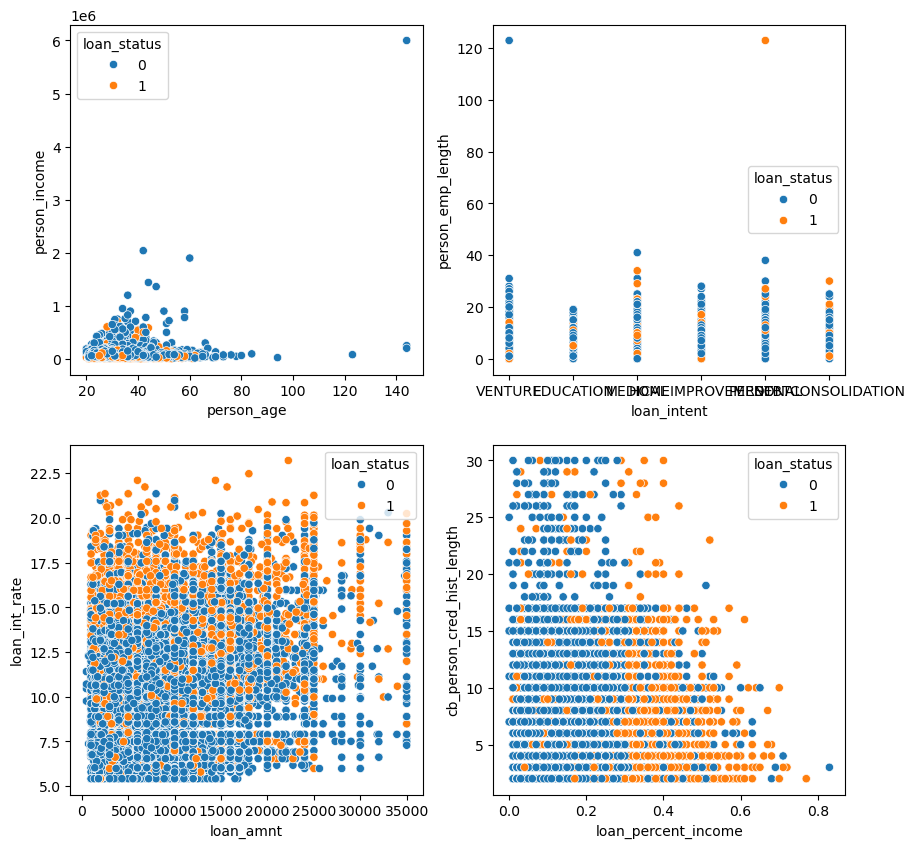

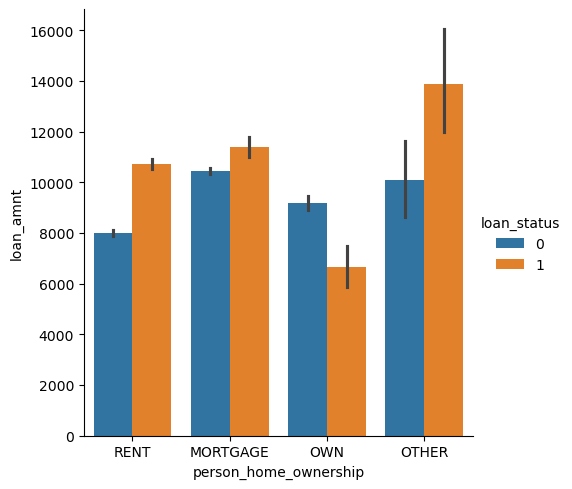

In [10]:
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
p1 = sns.scatterplot(df_train, x = "person_age", y = "person_income", hue = "loan_status", ax = ax[0,0])
p2 = sns.scatterplot(df_train, x = "loan_intent", y = "person_emp_length", hue = "loan_status", ax = ax[0,1])
p3 = sns.scatterplot(df_train, x = "loan_amnt", y = "loan_int_rate", hue = "loan_status", ax = ax[1,0])
p4 = sns.scatterplot(df_train, x = "loan_percent_income", y = "cb_person_cred_hist_length", hue = "loan_status", ax = ax[1,1])

p5 = sns.catplot(data=df_train, kind="bar", x="person_home_ownership", y="loan_amnt", hue="loan_status")
#p6 = sns.displot(df_train, x="loan_int_rate", col="loan_status", row="person_home_ownership")

<h1> Part C: <h1>

In [11]:
from itertools import combinations

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
all_quant_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
columns = []
for qual in combinations(all_qual_cols, 1): 
  qual_cols1 = [col for col in X_train.columns if qual[0] in col ]
  #qual_cols2 = [col for col in X_train.columns if qual[1] in col ]
  #qual_cols3 = [col for col in X_train.columns if qual[2] in col ]
  for pair in combinations(all_quant_cols, 1):
    cols = qual_cols1 + list(pair) 
    #cols = qual_cols1 + qual_cols2 + list(pair) 
    #cols = qual_cols1 + qual_cols2 + qual_cols3 + list(pair) 
    columns.append(cols) 
#Finds the best pairing of variables
best1 = ([], 0)
best2 = ([], 0)
from sklearn.exceptions import ConvergenceWarning

for x in columns:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        X_train1 = X_train[x]
        LR = LogisticRegression()
        m = LR.fit(X_train1, y_train)
        score = LR.score(X_train1, y_train)
        if score > best1[1]:
            best2 = best1
            best1 = (x, score)
        elif score == best1[1]:
            print(x, score)
print(best1[1], best1[0])
print(best2[1], best2[0])

0.8492600515126381 ['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_percent_income']
0.817217444449295 ['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_int_rate']


In [12]:
best_vars = ['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_percent_income']
with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        X_train1 = X_train[best_vars]
        LR = LogisticRegression()
        m = LR.fit(X_train1, y_train)
        score = LR.score(X_train1, y_train)
weights = LR.coef_
weights

array([[-0.76352014, -0.10753429, -1.80005286,  0.27250832,  8.27561064]])

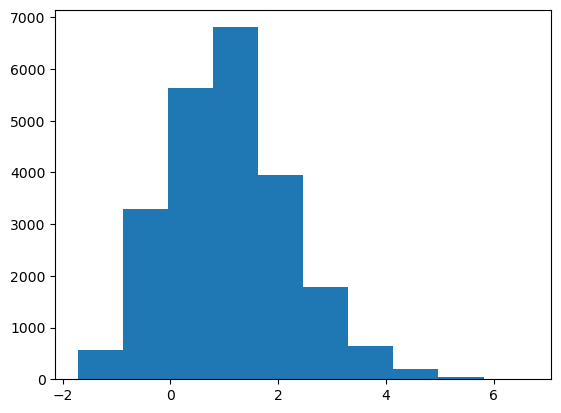

In [26]:
def linear_score(df, w, x):
    sum = 0
    for i in range(len(x)):
        sum += w[0][i]*df[x[i]]
    return sum
lscores = linear_score(X_train, weights, best_vars)
hist = plt.hist(lscores)

In [27]:
def predict(score_fun, w, x, threshold, df):
    """
    make binary predictions for data df using a supplied score function with weights w and supplied threshold. 
    """
    scores = score_fun(df, w, x)
    return 1*(scores > threshold)

<h1> Part D: <h1>

In [163]:
acc = []
for t in np.linspace(lscores.min()-.01, lscores.max()+.01, 101):
    y_pred = lscores >= t
    ac = (y_pred == y_train).mean()
    acc = acc + [(y_pred == y_train).mean()]
    print(f"A threshold of {t:.2f} gives an accuracy of {ac:.3f}.")
#2.6 - 2.8 best threshold for accuracy

A threshold of -1.73 gives an accuracy of 0.215.
A threshold of -1.64 gives an accuracy of 0.215.
A threshold of -1.56 gives an accuracy of 0.216.
A threshold of -1.48 gives an accuracy of 0.218.
A threshold of -1.39 gives an accuracy of 0.220.
A threshold of -1.31 gives an accuracy of 0.223.
A threshold of -1.22 gives an accuracy of 0.225.
A threshold of -1.14 gives an accuracy of 0.228.
A threshold of -1.06 gives an accuracy of 0.230.
A threshold of -0.97 gives an accuracy of 0.233.
A threshold of -0.89 gives an accuracy of 0.239.
A threshold of -0.81 gives an accuracy of 0.242.
A threshold of -0.72 gives an accuracy of 0.245.
A threshold of -0.64 gives an accuracy of 0.250.
A threshold of -0.55 gives an accuracy of 0.258.
A threshold of -0.47 gives an accuracy of 0.271.
A threshold of -0.39 gives an accuracy of 0.286.
A threshold of -0.30 gives an accuracy of 0.305.
A threshold of -0.22 gives an accuracy of 0.323.
A threshold of -0.13 gives an accuracy of 0.342.
A threshold of -0.05

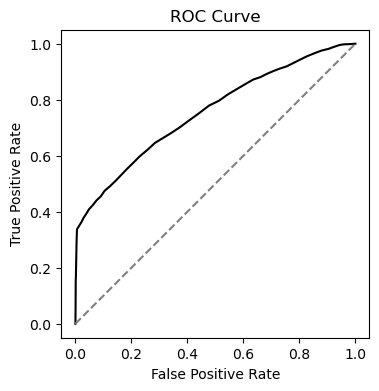

In [112]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

num_thresholds = 101

FPR = np.zeros(num_thresholds)
TPR = np.zeros(num_thresholds)
confusions = []
T = np.linspace(lscores.min()-0.1, lscores.max()+0.1, num_thresholds)
s = linear_score(X_train, weights, best_vars)

for i in range(num_thresholds):
    t = T[i]
    preds = s >= t
    FPR[i] = ((preds == 1) & (y_train == 0)).sum() / (y_train == 0).sum()
    TPR[i] = ((preds == 1) & (y_train == 1)).sum() / (y_train == 1).sum()
    confusions.append(confusion_matrix(y_train, preds))


ax.plot(FPR, TPR, color = "black")
ax.plot([0,1], [0,1], linestyle="--", color = "grey")
ax.set_aspect('equal')

labs = ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate", title = "ROC Curve")

In [220]:
X_train["bank_profit_repaid"] = X_train["loan_amnt"]*(1 + 0.25*(X_train["loan_int_rate"]/100))**10 - X_train["loan_amnt"]
X_train["bank_profit_default"] = X_train["loan_amnt"]*(1 + 0.25*(X_train["loan_int_rate"]/100))**3 - 1.7*X_train["loan_amnt"]

In [214]:
good_choice = []
bad_choice = []
prob_0 = (confusions[1][0][0]+confusions[1][0][1])/confusions[1].sum()
prob_1 = (confusions[1][1][0]+confusions[1][1][1])/confusions[1].sum()
for x in confusions:
    good_choice.append(float(x[0][0]))
    bad_choice.append(float(x[1][0]))


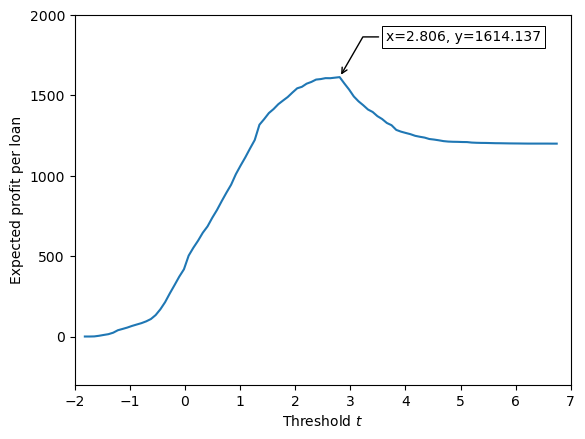

In [290]:
TNR = 1 - FPR
FNR = 1 - TPR

cost_of_FN = X_train["bank_profit_default"]
gain_of_TN = X_train["bank_profit_repaid"]
#This has the same maximum as the equation below, however it does not show the E[] per loan
#gain =  gain_of_TN.mean()*np.array(good_choice)  + cost_of_FN.mean()*np.array(bad_choice)

# I was looking at the fourth set of notes from class and was confused at the equation we were using to calculate gain.
# It did not seem to give us any useful information gain, so I figured there might be an error. I look online and found
# a gain equation that was what was mentioned in class but now normalized (https://medium.com/@overfittedcat/expected-value-as-evaluation-metric-in-machine-learning-b3836511cd)
gain = prob_0*(gain_of_TN.mean() * TNR) + prob_1*(cost_of_FN.mean() * FNR)

# Gain function from notes
#gain = (gain_of_TN.mean() * TNR) + (cost_of_FN.mean() * FNR)

plt.plot(T, gain)

#The following function I found online for annotating the maximum point
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(T,gain)
plt.gca().set(ylim = (-300, 2000), xlim = (-2, 7))
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Expected profit per loan")

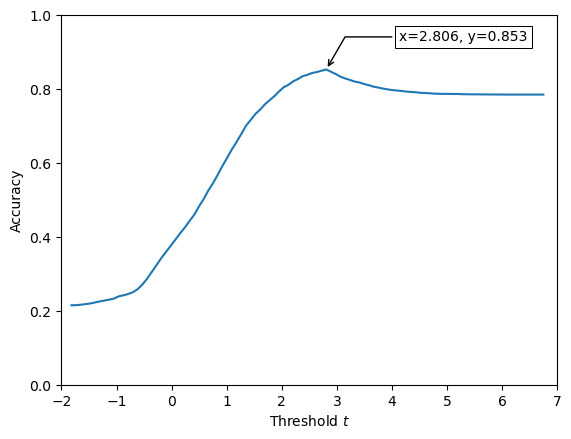

In [218]:
plt.plot(T, acc)
annot_max(T, np.array(acc))
plt.gca().set(ylim = (0, 1), xlim = (-2, 7))
labs = plt.gca().set(xlabel = r"Threshold $t$", ylabel = "Accuracy")

In this section I created a gain function using the average gain on a fully repaid loan and the average loss on a defaulted loan. After examining the expected gain function we were given in class, I felt like it did not provide us with any substantial information gain, so I researched expected value functions and found a version of the in-class function that was normalized. The two graphs above show the optimal threshold for accuracy and expected profit per loan. For both the maximizing threshold was 2.806 and it brought our accuracy up to 85.3% and our expected profit per loan to $1614.14.

<h1> Part: E

In [291]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/test.csv"
df_test = pd.read_csv(url)

X_test, y_test = prepare_data(df_test)

X_test["bank_profit_repaid"] = X_test["loan_amnt"]*(1 + 0.25*(X_test["loan_int_rate"]/100))**10 - X_test["loan_amnt"]
X_test["bank_profit_default"] = X_test["loan_amnt"]*(1 + 0.25*(X_test["loan_int_rate"]/100))**3 - 1.7*X_test["loan_amnt"]



y_predicted = predict(linear_score, weights, best_vars, 2.806, X_test)
df_test["test_predicted"] = y_predicted
invert = (y_predicted + 1) % 2

gaint = (X_test["bank_profit_default"] * y_predicted) + (X_test["bank_profit_repaid"] * invert)
print(gaint.mean())

FPR1   = ((y_predicted == 1) & (y_test == 0)).sum() / (y_test == 0).sum()
TPR1   = ((y_predicted == 1) & (y_test == 1)).sum() / (y_test == 1).sum()

TNR1 = 1 - FPR1
FNR1 = 1 - TPR1

confuse = confusion_matrix(y_test, y_predicted)

prob_zero = (confuse[0][0]+confuse[0][1])/confuse.sum()
prob_one = (confuse[1][0]+confuse[1][1])/confuse.sum()

gain_test = prob_zero*(X_test["bank_profit_repaid"].mean() * TNR1) + prob_one*(X_test["bank_profit_default"].mean() * FNR1)
gain_test

1966.832456892238


1605.4481388536585

In [231]:
1 - 1605.448/1614.137 

0.005383062280339135

The expected gain for the test data set is very close to our train data set. The training set was 1614.137 and our test set is 1605.448. That is only a $8.69 difference. From the banks perspective the weights and threshold we selected were only .5% off which is pretty good.

<h1> Part F:

<Axes: xlabel='person_age', ylabel='test_predicted'>

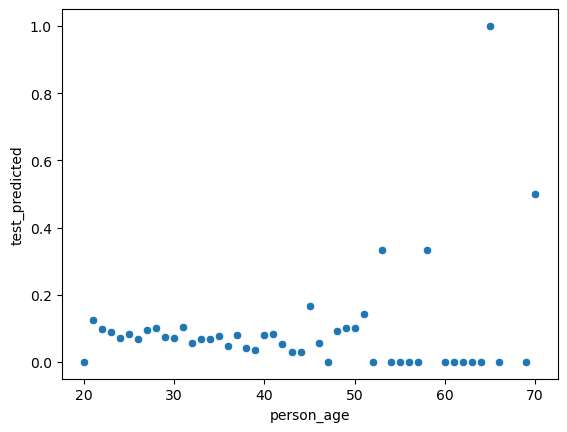

In [273]:
#sns.catplot(data=df_test, kind="bar", x="person_age", y="test_predicted")
#sns.scatterplot(df_test, x = "person_age", y = "test_predicted")

tr = df_test.groupby("person_age").aggregate("test_predicted").mean()
sns.scatterplot(tr)




In [275]:
intent_predicted = df_test.groupby("loan_intent").aggregate("test_predicted").mean()
intent_real = df_test.groupby("loan_intent").aggregate("loan_status").mean()
print(intent_predicted)
print(intent_real)

loan_intent
DEBTCONSOLIDATION    0.095133
EDUCATION            0.075680
HOMEIMPROVEMENT      0.037338
MEDICAL              0.102516
PERSONAL             0.087174
VENTURE              0.079876
Name: test_predicted, dtype: float64
loan_intent
DEBTCONSOLIDATION    0.279497
EDUCATION            0.167421
HOMEIMPROVEMENT      0.246088
MEDICAL              0.281553
PERSONAL             0.219227
VENTURE              0.145701
Name: loan_status, dtype: float64


In [286]:
print("mean", df_test.groupby("test_predicted").aggregate("person_income").mean())
print("median", df_test.groupby("test_predicted").aggregate("person_income").median())

mean test_predicted
0.0    69033.762122
1.0    39483.673729
Name: person_income, dtype: float64
median test_predicted
0.0    58700.0
1.0    36000.0
Name: person_income, dtype: float64



1) Is it more difficult for people in certain age groups to access credit under your proposed system?
    - For the most part as you get older the more likely you are to get access to credit

2) Is it more difficult for people to get loans in order to pay for medical expenses? How does this compare with the actual rate of default in that group? What about people seeking loans for business ventures or education?
    - Compared to other intents, medical loans are predicted to be the most likely to default under my model. In the actual data medical loans also have the highest default rate. Across the board my model is more lenient when it comes to loan default prediction.

3) How does a person’s income level impact the ease with which they can access credit under your decision system?
    - The lower someone's income the more likely they are to be predicted to default.

<h1> Part G: